# Cancer Cell Samples: 4 Classification Models

What is the likelihood that a patient's cancer is malignant? Today, we'll look into this question. We'll optimize, train, make predictions with, and evaluate four classification models - K Nearest Neighbor (KNN), Decision Tree, Support Vector Machine (SVM), and logistic regression - to predict the class of new patient cell sample. We'll work with cell sample data publicly available from the UCI ML repository (https://archive.ics.uci.edu/ml/index.php). The data set includes cell samples from 699 patients with cell characteristics such as clump thickness, uniformity of size, uniformity of shape, marginal adhesion, bare nuclei, single epithelial cell size, and mitoses. A hospital's oncology department, for example, could apply a predictive model alongside diagnostic procedures and patient evaluation to improve cancer diagnosis. Let's break it down:

**Part 1**: Cleaning and wrangling, including replacing values
<br>**Part 2**: Exploratory analysis, including plotting stratified scatter and bubble plots and histograms, working with groupby, and making observations to determine key features
<br>**Part 3**: Feature selection of predictors (X) and labeled target (y)
<br>**Part 4**: Normalizing feature set using scikit learn's preprocessing.StandardScaler.fit.transform
<br>**Part 5**: KNN, including determining and plotting optimal k value, training model and making predictions on test set, generating a confusion matrix heatmap and report, evaluating jaccard and F1 scores
<br>**Part 6**: Decision Tree, including determining and plotting optimal max depth, training model and making predictions on test set, visualizing decision tree using pydotplus and graphviz, generating a confusion matrix heatmap and report, evaluating jaccard and F1 scores
<br>**Part 7**: SVM, including determining and plotting optimal kernel function, training model and making predictions on test set, generating a confusion matrix heatmap and report, evaluating jaccard and F1 scores
<br>**Part 8**: Logistic Regression, including determining and plotting optimal regularization and numerical solver, training model and making predictions on test set, calculating probability, generating a confusion matrix heatmap and report, evaluating jaccard, F1, and log loss scores
<br>**Part 9**: Evaluating model performance head-to-head by creating a dataframe of accuracy scores for KNN, Decision Tree, SVM, and Logistic Regression models to make comparisons

We'll cover cleaning, wrangling, and visualizing techniques, apply important scikit learn libraries to develop, optimize, train, and make predictions, and walk through evaluating and comparing models. We'll discover that, using features in this data set, logistic regression generates the highest accuracy of our 4 models. It also has the added benefit of providing percent likelihood that a patient's cancer is malignant. Let's dig in.

In [297]:
# Import relevant libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns

# Scikit learn libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import scipy.optimize as opt
from sklearn.svm import SVC 
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# Visualizing Decision Tree
!pip install graphviz
!pip install pydotplus
import graphviz 
import pydotplus

In [298]:
# The code was removed by Watson Studio for sharing.

## Part 1: Cleaning and Wrangling

In [299]:
# Read in data
pd.set_option("display.max_columns", 100)
df = pd.read_csv(body)

In [300]:
# Check first few rows
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Our cell sample dataframe contains 11 attributes for each patient cell sample. Except for ID and Class, each attribute is a cell characteristic scored from 1 to 10 with 1 being closest to benign and 10 being closest to malignant. The variable Class is the confirmed diagnosis with 2 being benign and 4 being malignant. 

**ID**: Patient ID
<br>**Clump**: Clump thickness
<br>**UnifSize**: Uniformity of cell size
<br>**UnifShape**: Uniformity of cell shape
<br>**MargAdh**: Marginal adhesion
<br>**BareNuc**: Bare nuclei
<br>**SingEpiSize**: Single epithelial cell size
<br>**BlandChrom**: Bland chromatin
<br>**NormNucl**: Normal nucleoli
<br>**Mit**: Mitoses
<br>**Class**: Cancer class (2=benign, 4=malignant)

In [301]:
# Check dimensions of dataframe. We have 699 cell samples and 11 attributes
df.shape

(699, 11)

In [302]:
# Check number of null values. There are no null values
df.isnull().sum().to_frame()

,0
ID,0
Clump,0
UnifSize,0
UnifShape,0
MargAdh,0
SingEpiSize,0
BareNuc,0
BlandChrom,0
NormNucl,0
Mit,0


In [303]:
# Check datatypes.
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [304]:
# The variable BareNuc is type object, let's convert that to integer. 
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [305]:
# Convert gender strings 'Male' to 0 and 'Female' to 1
df['Class'].replace(to_replace=[2,4], value=["Benign","Malignant"],inplace=True)
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,Benign
1,1002945,5,4,4,5,7,10,3,2,1,Benign
2,1015425,3,1,1,1,2,2,3,1,1,Benign
3,1016277,6,8,8,1,3,4,3,7,1,Benign
4,1017023,4,1,1,3,2,1,3,1,1,Benign


## Part 2: Exploratory Analysis

In [306]:
# As we'll be plotting with seaborn, let's set the style to darkgrid
sns.set_style("darkgrid")

In [307]:
# Check cancer class split. We have 444 benign and 239 malignant.
df['Class'].value_counts().to_frame()

,Class
Benign,444
Malignant,239


Let's plot UnifSize vs Clump stratified by Class (benign or malignant). We see that benign samples mostly bunch together with Clump thickness and UnifSize of 5 or below while malignant samples tend toward Clump and UnifSize on the higher end, though are widely dispersed. 

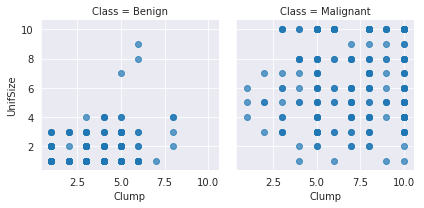

In [308]:
# Scatter plot of UnifSize vs Clump stratified by Class
g=sns.FacetGrid(df, col = "Class")
g.map(plt.scatter, "Clump", "UnifSize", alpha=0.7)

Let's plot UnifShape vs UnifSize stratified by Class (benign or malignant). Here we can see a clearer difference. Benign samples mostly bunch together with UnifSize and UnifShape of 5 or below while malignant samples tend toward UnifSize and UnifShape on the higher end.

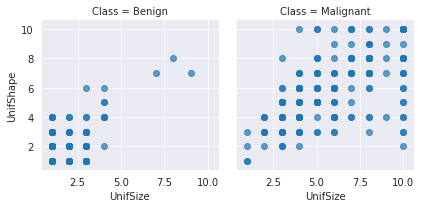

In [309]:
# Scatter plot of UnifShape vs UnifSize stratified by Class
g=sns.FacetGrid(df, col = "Class")
g.map(plt.scatter, "UnifSize", "UnifShape", alpha=0.7)

We can look at it in a different way. Let's combinine in a single plot with a scatter plot of UnifShape vs UnifSize using a light color for benign and darker color for malignant. The trend we saw above looks clearer. 

Text(0.5, 1.0, 'UnifShape vs UnifSize by Class')

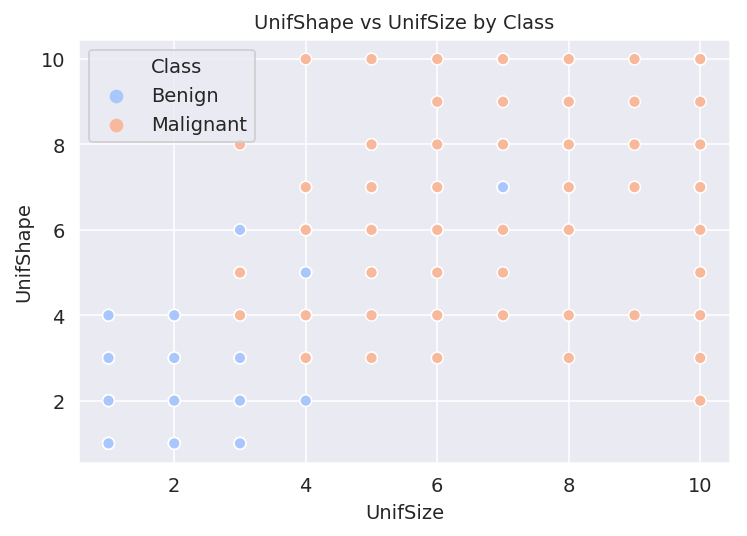

In [310]:
# Scatter plot of UnifShape vs UnifSize stratified by Class
plt.figure(dpi=140) # Figure size must be set before calling the plot
sns.scatterplot(df["UnifSize"], df["UnifShape"], hue = df["Class"], palette = "coolwarm")
plt.title("UnifShape vs UnifSize by Class", fontsize=10)

We can add more dimensionality to the above by also adjusting the size of the bubbles according to clump thickness. Here we see that high clump values appear across benign and malignant samples. 

Text(0.5, 1.0, 'UnifShape vs UnifSize by Class and Clump')

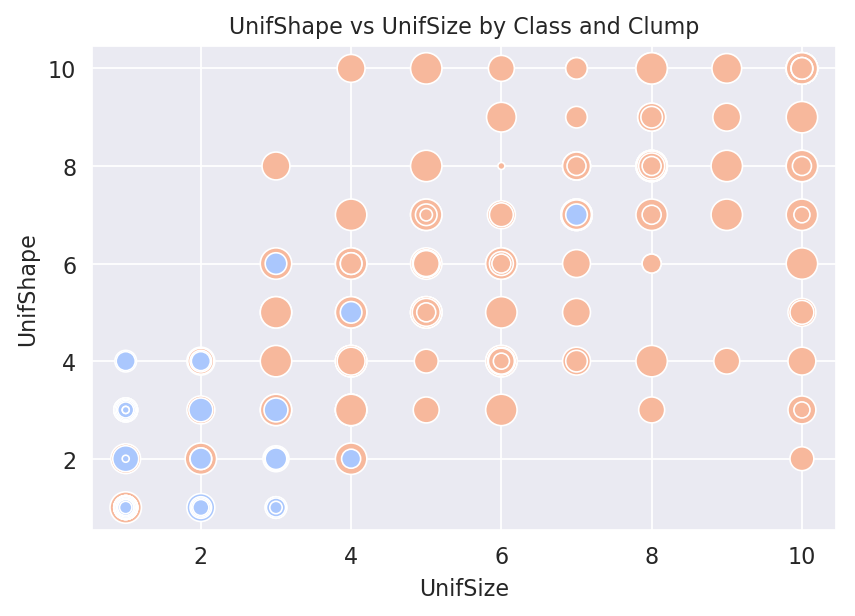

In [365]:
# Scatter plot of UnifShape vs UnifSize stratified by Class and Clump
plt.figure(dpi=160) # Figure size must be set before calling the plot
sns.scatterplot(df["UnifSize"], df["UnifShape"], hue = df["Class"], size = df["Clump"], sizes = (10,200), palette="coolwarm", legend=False)
plt.title("UnifShape vs UnifSize by Class and Clump", fontsize=10)

Let's check how UnifSize is distributed by Class. We see below that for benign samples, UnifSize is heavily right skewed, while for malignant samples, they are quite uniformly distributed (slight left skew).

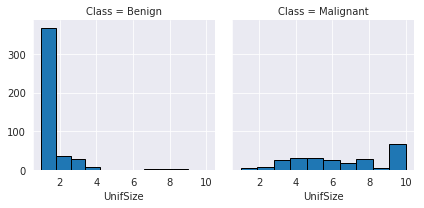

In [312]:
# Plot histogram of UnifSize stratified by UnifShape and Class
g = sns.FacetGrid(df, col="Class", col_wrap=2)
g.map(plt.hist, 'UnifSize', ec="k")
plt.show()

We can add more dimensionality to the above by stratifying by both Class and Clump thickness. We see that for low clump thickness, samples are entirely benign and UnifSize is nearly entirely the value 1. As clump thickness increases, samples tend to be malignant while UnifSize becomes more uniformly distributed. 

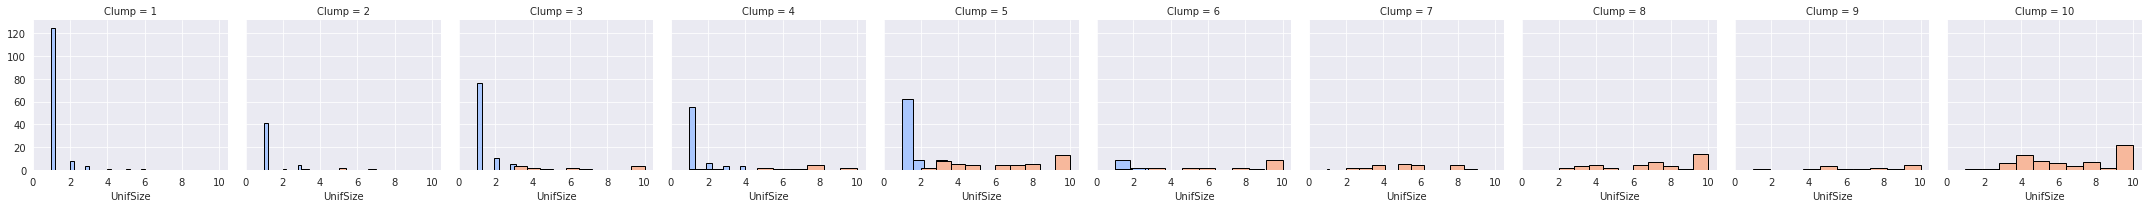

In [313]:
# Plot histogram of UnifSize stratified by UnifShape and Class
g = sns.FacetGrid(df, col="Clump", hue="Class", palette="coolwarm")
g.map(plt.hist, 'UnifSize', ec="k")
plt.show()

Grouping our data by UnifSize using groupby, we see that 99% of samples are benign with UnifSize of 1. As UnifSize increases, the percentage of benign steadily decreases while that of malignant steadily increases. 

In [314]:
# Check percentage of Class by UnifSize 
df.groupby(['UnifSize'])['Class'].value_counts(normalize=True).to_frame()

Class
UnifSize Class              
1        Benign     0.989276
         Malignant  0.010724
2        Benign     0.822222
         Malignant  0.177778
3        Benign     0.519231
         Malignant  0.480769
4        Malignant  0.789474
         Benign     0.210526
5        Malignant  1.000000
6        Malignant  1.000000
7        Malignant  0.947368
         Benign     0.052632
8        Malignant  0.964286
         Benign     0.035714
9        Malignant  0.833333
         Benign     0.166667
10       Malignant  1.000000

## Part 3: Feature Selection

Let's select our predictors, feature set X. 

In [315]:
# Create a numpy array for the features we'll be selecting. Numpy array is required for the scikit learn alogrithms later. 
features = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X=np.asarray(features)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

Let's select our labeled target as Class, y.

In [316]:
y = df['Class'].values
y[0:5]

array(['Benign', 'Benign', 'Benign', 'Benign', 'Benign'], dtype=object)

## Part 4: Normalizing Feature Set

It's important to normalize our feature set to a zero mean and variance to prevent individual feature from being over or underweighted and in order to generate interpretable, reliable predictions. We can do this using the scikit learn libraries StandardScaler, fit, and transform.

In [317]:
# Normalize using scikit learn preprocessing libraries StandardScaler, fit, transform. 
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.2 , -0.7 , -0.74, -0.64, -0.56, -0.7 , -0.18, -0.61, -0.35],
       [ 0.2 ,  0.28,  0.26,  0.76,  1.7 ,  1.77, -0.18, -0.29, -0.35],
       [-0.51, -0.7 , -0.74, -0.64, -0.56, -0.42, -0.18, -0.61, -0.35],
       [ 0.55,  1.58,  1.6 , -0.64, -0.11,  0.13, -0.18,  1.35, -0.35],
       [-0.16, -0.7 , -0.74,  0.06, -0.56, -0.7 , -0.18, -0.61, -0.35]])

## Classification Models - Optimize Algorithms, Build Train and Test Sets, and Evaluate Models

Let's build and compare 4 classification models: K Nearest Neighbor (KNN), Decision Tree, Support Vector Machine (SVM), and Logistic Regression.

## Part 5: KNN

In [318]:
# Split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
print ('Training set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Training set: (580, 9) (580,)
Test set: (103, 9) (103,)


Let's determine our optimal value of K for the number of nearest neighbors. A K value that is too low will capture too much noise (overfit) while one that is too large will be over-generalized. Below, we determine our optimal K value is 8, which has a cross-validation accuracy of 0.97.

In [319]:
# Determine optimal k value. 
best_score = 0.0
acc_list=[]

for k in range(3,15):
    
    clf_knn = KNeighborsClassifier(n_neighbors = k, algorithm='auto')
    
    # using 10-fold cross validation for scoring the classifier's accuracy
    scores = cross_val_score(clf_knn, X, y, cv=10)
    score = scores.mean()
    acc_list.append(score)
    
    if score > best_score:
        best_score=score
        best_clf = clf_knn
        best_k = k
        
print("Best K is :",best_k,"| Cross validation Accuracy :",best_score)
clf_knn = best_clf

Best K is : 8 | Cross validation Accuracy : 0.9708866155157715


Let's plot accuracy across varying K values. We see our optimal K value, the one with the highest accuracy, is 8.

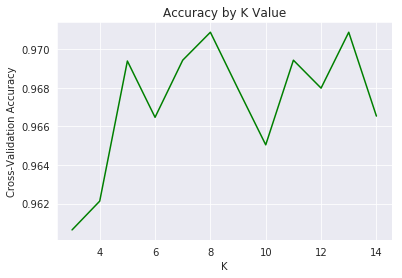

In [320]:
# Plot accuracy of various K values. 
plt.plot(range(3,15),acc_list, c="g")
plt.xlabel('K')
plt.ylabel('Cross-Validation Accuracy')
plt.title("Accuracy by K Value")
plt.show()

In [321]:
# Train model using our algorithm above with optimal value of K of 8
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [322]:
# Make predictions on test set using our model
y_hat_knn = clf_knn.predict(X_test)
y_hat_knn[0:5]

array(['Benign', 'Benign', 'Benign', 'Malignant', 'Benign'], dtype=object)

#### Evaluating KNN Performance

Let's calculate the confusion matrix to evaluate model performance.

In [323]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_hat_knn,labels=["Benign","Malignant"]) 
print(cm)

[[66  0]
 [ 1 36]]


Let's plot a heatmap to make it easier to visualize and interpret:

Top left is true negative (TN)
<br> Top right is false positive (FP)
<br>Bottom left is false negative (FN)
<br>Bottom right is true postivie (TP)

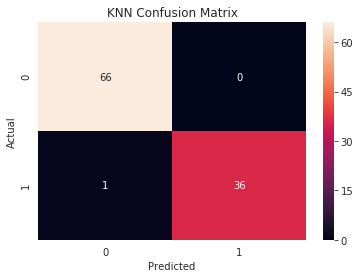

In [324]:
# Plot heatmap of confusion matrix
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

Let's generate our confustion matrix report to evaluate model performance. Remember that:

Precision is the ratio of true postives to all positive predicted by model, Precision = TP / (TP + FP).

Recall is the ratio of true positives to all positives actually in our data set, Recall = TP / (TP + FN).

F1-score is the harmonic mean of preicision and recall.

In [325]:
# Confusion matrix report
np.set_printoptions(precision=2)
print (classification_report(y_test, y_hat_knn))

              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99        66
   Malignant       1.00      0.97      0.99        37

   micro avg       0.99      0.99      0.99       103
   macro avg       0.99      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103



We can also calculate jaccard similarity score and f1-score automaically using the jaccard_similarity_score and f1_score functions, respectively. Jaccard score is the intersection divided by the union of the two labeled sets (the test and fitted set). F1-score is the harmonic mean of precision and recall as we saw above.

In [326]:
# Jaccard similarity score for KNN model for test set
jaccard_knn = jaccard_similarity_score(y_test, y_hat_knn)
jaccard_knn

0.9902912621359223

In [327]:
# F1 score for KNN model for test set
f1_knn = f1_score(y_test, y_hat_knn, average='weighted')
f1_knn

0.9902612629459004

## Part 6: Decision Tree

Before we train and test our decision tree, let's determine our max depth that will yield the highest accuracy. When training our decision tree, we'll focus here on reducing entropy as much as possible (maximizing information gain) in each node of the tree. We see below that our max depth that will achieve the highest accuracy is 4. We see in our plot below that accuracy drops off after this point.

In [328]:
# Test max depths from 1 to 19
depth_range = range(1, 20)

# Create empty array for jaccard and f1 scores 
jaccard_similarity_score_ = []
f1_score_ = []

# Use for loop to train decision tree using increasing max depth values.  
# Make predictions using test set, append jaccard and F1 score to arrays created above
for d in depth_range:
    dec_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = d)
    dec_tree.fit(X_train, y_train)
    y_hat_tree = dec_tree.predict(X_test)
    jaccard_similarity_score_.append(jaccard_similarity_score(y_test, y_hat_tree))
    f1_score_.append(f1_score(y_test, y_hat_tree, average = 'weighted'))

In [329]:
# Create dataframe with jaccard and F1 accuaracy values to determine best max depth. We see the best max depth is d = 4. 
result = pd.DataFrame([jaccard_similarity_score_, f1_score_], index = ['Jaccard', 'F1'], columns = ['d = 1','d = 2','d = 3','d = 4','d = 5','d = 6','d = 7','d = 8','d = 9','d = 10', 'd = 11', 'd = 12', 'd = 13', 'd = 14', 'd = 15', 'd = 16', 'd = 17', 'd = 18', 'd = 19'])
result.columns.name = 'Evaluation Metrics'
result

Evaluation Metrics,d = 1,d = 2,d = 3,d = 4,d = 5,d = 6,d = 7,d = 8,d = 9,d = 10,d = 11,d = 12,d = 13,d = 14,d = 15,d = 16,d = 17,d = 18,d = 19
Jaccard,0.932039,0.932039,0.980583,0.980583,0.970874,0.951456,0.941748,0.941748,0.951456,0.941748,0.941748,0.951456,0.941748,0.951456,0.951456,0.951456,0.941748,0.941748,0.941748
F1,0.932573,0.932573,0.980583,0.980583,0.970784,0.950970,0.940940,0.940940,0.950970,0.940940,0.940940,0.950970,0.940940,0.950970,0.950970,0.950970,0.940940,0.940940,0.940940


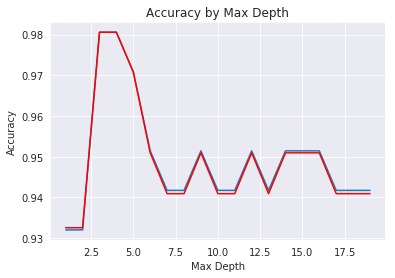

In [330]:
# Plot accuracy of various max depths, jaccard score in blue and F1 score in red. 
plt.plot(range(1,20),jaccard_similarity_score_)
plt.plot(range(1,20),f1_score_, c='r')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title("Accuracy by Max Depth")
plt.show()

In [331]:
# Set tree algorithm to max depth 4
dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dec_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [332]:
# Train decision tree
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [333]:
# Make prediction on test set using our model
y_hat_tree = dec_tree.predict(X_test)
y_hat_tree[0:5]

array(['Benign', 'Benign', 'Benign', 'Malignant', 'Benign'], dtype=object)

Let's visualize our decision tree, which has a depth of 4 nodes. Keep in mind that values for our features are normalized. Our initial node is a criterion for UnifSize, which splits into criteria for BareNuc and UnifSize. We can continue to follow the nodes and branches down, with each step maximizing reduction in entropy (maximizing information gain).

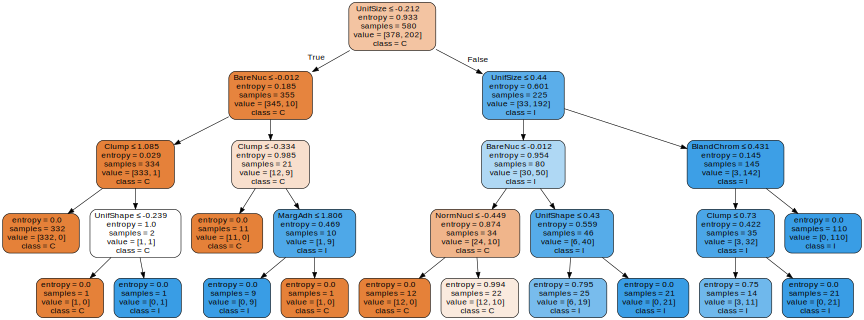

In [334]:
# Visualize decision tree using tree.export_graphviz
dot_data = tree.export_graphviz(dec_tree, out_file=None, 
                     feature_names=['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit'],  
                     class_names='Class',  
                     filled=True, rounded=True,  
                     special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"12,12!"')
gvz_graph = graphviz.Source(graph.to_string())

gvz_graph

#### Evaluating Decision Tree Performance

Let's calculate the confusion matrix to evaluate model performance.

In [335]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_hat_tree,labels=["Benign","Malignant"]) 
print(cm)

[[65  1]
 [ 0 37]]


Let's plot a heatmap to make it easier to visualize and interpret:

Top left is true negative (TN)
<br> Top right is false positive (FP)
<br>Bottom left is false negative (FN)
<br>Bottom right is true postivie (TP)

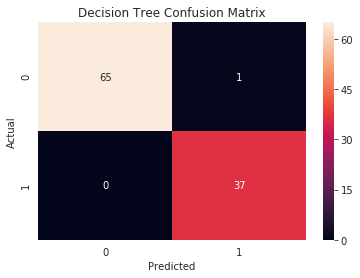

In [336]:
# Plot heatmap of confusion matrix
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

Let's generate our confustion matrix report to evaluate model performance. Remember that:

Precision is the ratio of true postives to all positive predicted by model, Precision = TP / (TP + FP).

Recall is the ratio of true positives to all positives actually in our data set, Recall = TP / (TP + FN).

F1-score is the harmonic mean of preicision and recall.

In [337]:
# Confusion matrix report
np.set_printoptions(precision=2)
print (classification_report(y_test, y_hat_tree))

              precision    recall  f1-score   support

      Benign       1.00      0.98      0.99        66
   Malignant       0.97      1.00      0.99        37

   micro avg       0.99      0.99      0.99       103
   macro avg       0.99      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103



We can also calculate jaccard similarity score and f1-score automaically using the jaccard_similarity_score and f1_score functions, respectively. Jaccard score is the intersection divided by the union of the two labeled sets (the test and fitted set). F1-score is the harmonic mean of precision and recall as we saw above.

In [338]:
# Jaccard similarity score for decision tree
jaccard_tree = jaccard_similarity_score(y_test, y_hat_tree)
jaccard_tree

0.9902912621359223

In [339]:
# F1 score for decision tree
f1_tree = f1_score(y_test, y_hat_tree, average='weighted')
f1_tree

0.9903189308036264

## Part 7: SVM

For our SVM, let's first determine which kernel function - linear, polynomial, radial basis function (rbf), or sigmoid - generates the highest accuracy. We see that the rbf kernel function generates the highest F1 score of 1.

In [340]:
# Determine optimal kernel function

# Array of kernel functions
kernel_func = ['sigmoid', 'poly', 'rbf', 'linear']

# Empty array for accuracy score (F1 score)
accuracy_score = []

# For each kernel function, train SVM model, run prediction on test set, calculate F1 score and append it to accuracy_score array
for k in kernel_func:
    svc_model = SVC(kernel = k) 
    svc_model.fit(X_train, y_train)
    y_hat_svm = svc_model.predict(X_test)
    accuracy_score.append(f1_score(y_test, y_hat_svm, average = 'weighted'))

accuracy_score

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.9804577436442384, 0.9505833151031317, 1.0, 0.9804577436442384]

Text(0, 0.5, 'Accuracy')

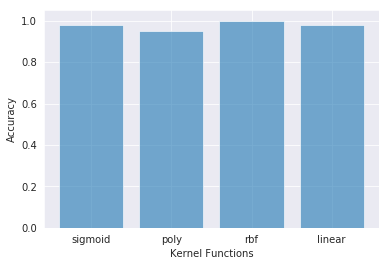

In [341]:
# Bar plot of accuracy score for each kernel function

y_pos = np.arange(len(kernel_func))
plt.bar(y_pos, accuracy_score, align='center', alpha = 0.6)
plt.xticks(y_pos, kernel_func)
plt.xlabel('Kernel Functions')
plt.ylabel('Accuracy')

In [342]:
# Set SVM algorithm with rbf kernel function
svc_model = SVC(kernel = 'rbf')

In [343]:
# Train SVM model 
svc_model.fit(X_train, y_train)
svc_model

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [344]:
# Make prediction on test set using our model
y_hat_svm = svc_model.predict(X_test)
y_hat_svm [0:5]

array(['Benign', 'Benign', 'Benign', 'Malignant', 'Benign'], dtype=object)

#### Evaluating SVM Performance

Let's calculate the confusion matrix to evaluate model performance.

In [345]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_hat_svm,labels=["Benign","Malignant"]) 
print(cm)

[[66  0]
 [ 0 37]]


Let's plot a heatmap to make it easier to visualize and interpret:

Top left is true negative (TN)
<br> Top right is false positive (FP)
<br>Bottom left is false negative (FN)
<br>Bottom right is true postivie (TP)

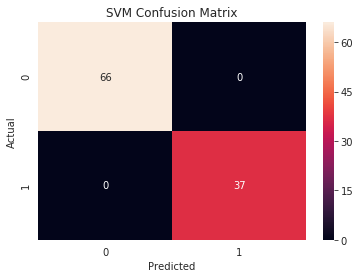

In [363]:
# Plot heatmap of confusion matrix
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

Let's generate our confustion matrix report to evaluate model performance. Remember that:

Precision is the ratio of true postives to all positive predicted by model, Precision = TP / (TP + FP).

Recall is the ratio of true positives to all positives actually in our data set, Recall = TP / (TP + FN).

F1-score is the harmonic mean of preicision and recall.

In [347]:
# Confusion matrix report
np.set_printoptions(precision=2)
print (classification_report(y_test, y_hat_svm))

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        66
   Malignant       1.00      1.00      1.00        37

   micro avg       1.00      1.00      1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



We can also calculate jaccard similarity score and f1-score automaically using the jaccard_similarity_score and f1_score functions, respectively. Jaccard score is the intersection divided by the union of the two labeled sets (the test and fitted set). F1-score is the harmonic mean of precision and recall as we saw above.

In [348]:
# Jaccard similarity score for SVM
jaccard_svm = jaccard_similarity_score(y_test, y_hat_svm)
jaccard_svm

1.0

In [349]:
# F1 score for SVM
f1_svm = f1_score(y_test, y_hat_svm, average='weighted')
f1_svm

1.0

## Part 8: Logistic Regression

Logistic regression is best suited for binary categorical target variable like the one we have. Moreover, it offers the benefit of determining not just whether a cell sample is benign or malignant, but also the probabality. For our logistic regression, let's first determine which combination of regularization (to account for overfitting) and numerical solver to find parameters - newton-cg, lbfgs, liblinear, sag, saga - generates the highest accuracy score (log loss score). We find below that our highest accuracy is with regularization C = 0.001 and solver liblinear.

In [350]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
regularization_val = [0.1, 0.01, 0.001]
index = []
accuracy_score = []
iterations = 0

for index1, c in enumerate(regularization_val):
    for index2, solver in enumerate(solvers):
        index.append(index1 + index2 *5)
        iterations +=1
        lr_model = LogisticRegression(C = c, solver = solver)
        lr_model.fit(X_train, y_train)
        y_hat_lr = lr_model.predict(X_test)
        y_prob = lr_model.predict_proba(X_test)
        print('Test {}: Accuracy at C = {} when Solver = {} is : {}'.format(iterations, c, solver, log_loss(y_test, y_prob) ))
        accuracy_score.append(log_loss(y_test, y_prob))
                              
    print('\n')

Test 1: Accuracy at C = 0.1 when Solver = newton-cg is : 0.0626973399297679
Test 2: Accuracy at C = 0.1 when Solver = lbfgs is : 0.06269733929883144
Test 3: Accuracy at C = 0.1 when Solver = liblinear is : 0.059306627039964754
Test 4: Accuracy at C = 0.1 when Solver = sag is : 0.06269313537049234
Test 5: Accuracy at C = 0.1 when Solver = saga is : 0.06269618608892168


Test 6: Accuracy at C = 0.01 when Solver = newton-cg is : 0.13848590963259835
Test 7: Accuracy at C = 0.01 when Solver = lbfgs is : 0.1384858977911758
Test 8: Accuracy at C = 0.01 when Solver = liblinear is : 0.1428640379696791
Test 9: Accuracy at C = 0.01 when Solver = sag is : 0.13848717033607313
Test 10: Accuracy at C = 0.01 when Solver = saga is : 0.13848676671555568


Test 11: Accuracy at C = 0.001 when Solver = newton-cg is : 0.3651506749689279
Test 12: Accuracy at C = 0.001 when Solver = lbfgs is : 0.36515059580264136
Test 13: Accuracy at C = 0.001 when Solver = liblinear is : 0.3981115641290984
Test 14: Accuracy 

Text(0, 0.5, 'Testing Accuracy')

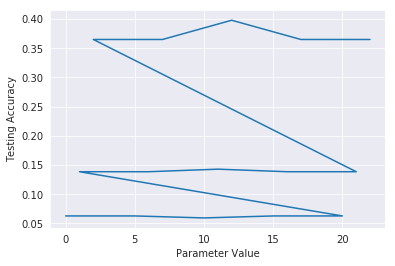

In [351]:
# Visualize the above accuracy tests, with the peak at test 13, which corresponds to C = 0.001 and solver = liblinear
lr_prob = lr_model.predict_proba(X_test)
log_loss(y_test, lr_prob)
plt.plot(index, accuracy_score)
plt.xlabel('Parameter Value')
plt.ylabel('Testing Accuracy')

In [352]:
# Set logistic regression with optimal regularization of C = 0.001 and solver = 'liblinear'
lr_model = LogisticRegression(C = 0.001, solver = 'liblinear')

In [353]:
# Train logistic regression model
lr_model.fit(X_train, y_train)
lr_model

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [354]:
# Make prediction on test set using our model
y_hat_lr = lr_model.predict(X_test)

In [355]:
# Determine probabilities of loan classification using our test set. We'll need this for our logloss score. 
y_hat_lr_prob = lr_model.predict_proba(X_test)
y_hat_lr_prob[0:5]

array([[0.59, 0.41],
       [0.68, 0.32],
       [0.65, 0.35],
       [0.32, 0.68],
       [0.7 , 0.3 ]])

#### Evaluating Logistic Regression Performance

Let's calculate the confusion matrix to evaluate model performance.

In [356]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_hat_lr,labels=["Benign","Malignant"]) 
print(cm)

[[66  0]
 [ 0 37]]


Let's plot a heatmap to make it easier to visualize and interpret:

Top left is true negative (TN)
<br> Top right is false positive (FP)
<br>Bottom left is false negative (FN)
<br>Bottom right is true postivie (TP)

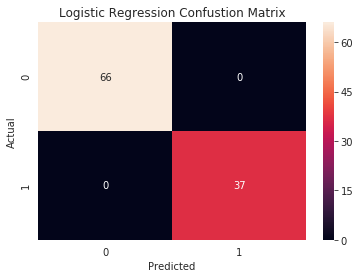

In [364]:
# Plot heatmap of confusion matrix
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confustion Matrix")
plt.show()

Let's generate our confustion matrix report to evaluate model performance. Remember that:

Precision is the ratio of true postives to all positive predicted by model, Precision = TP / (TP + FP).

Recall is the ratio of true positives to all positives actually in our data set, Recall = TP / (TP + FN).

F1-score is the harmonic mean of preicision and recall.

In [358]:
# Confusion matrix report
np.set_printoptions(precision=2)
print (classification_report(y_test, y_hat_lr))

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        66
   Malignant       1.00      1.00      1.00        37

   micro avg       1.00      1.00      1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



We can also calculate jaccard similarity score and f1-score automaically using the jaccard_similarity_score and f1_score functions, respectively. Jaccard score is the intersection divided by the union of the two labeled sets (the test and fitted set). F1-score is the harmonic mean of precision and recall as we saw above.

In [359]:
# Jaccard similarity score for logistic regression
jaccard_lr = jaccard_similarity_score(y_test, y_hat_lr)
jaccard_lr

1.0

In [360]:
# F1 score for logistic regression
f1_lr = f1_score(y_test, y_hat_lr, average='weighted')
f1_lr

1.0

In [361]:
# Logloss for logistic regression
logloss_lr = log_loss(y_test, y_hat_lr_prob) #Remember to use y_hat_lr_prob not just y_hat_lr
logloss_lr

0.3981115641290984

#### Evaluating Model Performance Head-to-Head

Let's compare KNN, decision tree, SVM, and logistic regression head-to-head using our specified parameters for classifying loan status for this data set. Creating a data frame with our evaluation metrics, we see that SVM and logistic regression perform best, while decision tree is the weakest. 

Choosing a logistic regression model on our parameters to predict cancer diagnosis would perform best with the added benefit of predicting percentage likelihood that a cell sample is malignant. 

In [362]:
# Create dataframe with evaluation metrics
evaluation = {"Jaccard":[jaccard_knn, jaccard_tree, jaccard_svm, jaccard_lr], 
             "F1-score":[f1_knn, f1_tree, f1_svm, f1_lr],
             "Log Loss":["NA", "NA", "NA", logloss_lr] 
             }
eval_df = pd.DataFrame(evaluation, columns=["Jaccard", "F1-score", "Log Loss"], index=["KNN", "Decision Tree", "SVM", "Logistic Regression"])
eval_df.columns.name = "Algorithm"
eval_df

Algorithm,Jaccard,F1-score,Log Loss
KNN,0.990291,0.990261,NA
Decision Tree,0.990291,0.990319,NA
SVM,1.000000,1.000000,NA
Logistic Regression,1.000000,1.000000,0.398112
